___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study####

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given.

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#### Load Dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [4]:
df.columns = df.columns.str.strip("(1-100)").str.strip("(k$ ").str.lower().str.replace(" ", "_")  # Clean column names if needed

In [5]:
df.head()

,customerid,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customerid      200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,customerid,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.shape

(200, 5)

In [9]:
# Checking for missing values
df.isnull().sum()

customerid        0
gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
# drop the columns that is not needed 
df.drop(columns=['customerid'], inplace=True)

In [12]:
df.shape

(200, 4)

---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





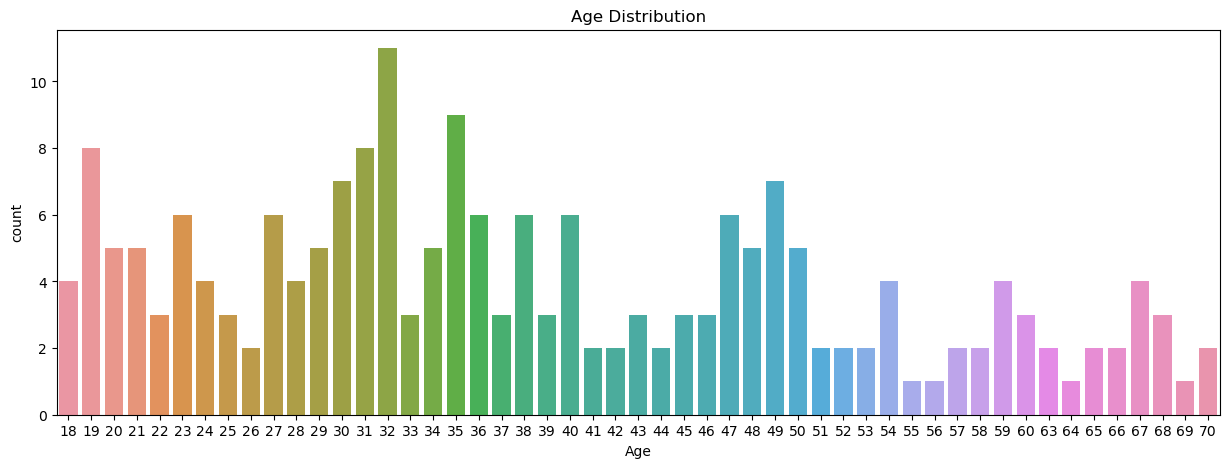

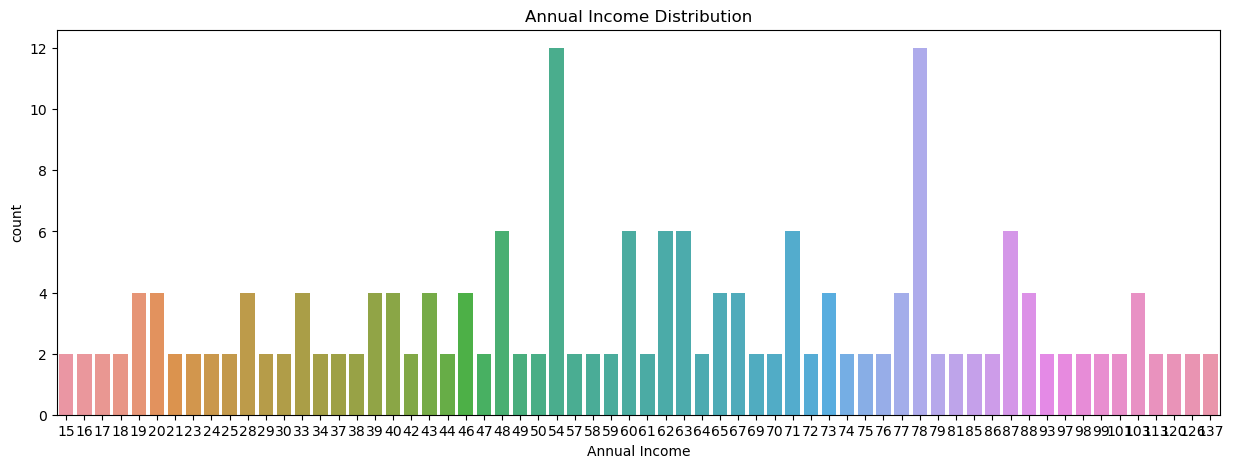

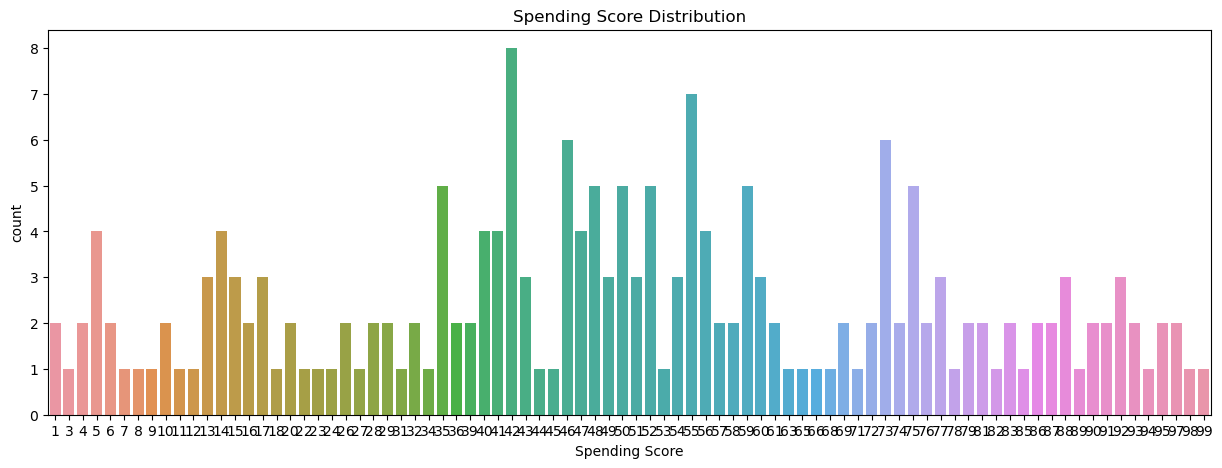

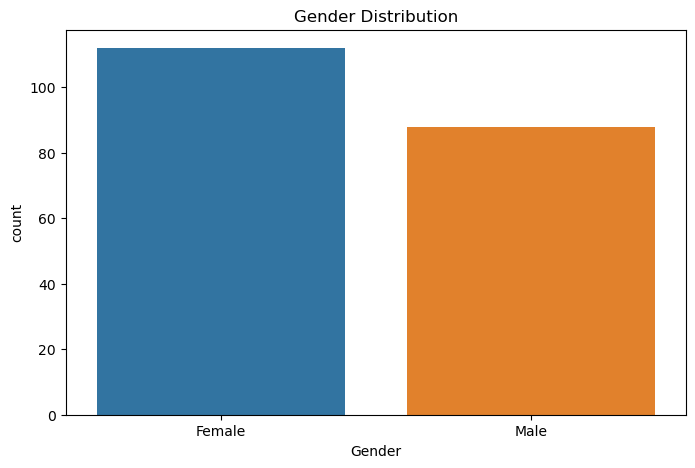

In [13]:
# Visualize age distribution
plt.figure(figsize=(15, 5))
sns.countplot(x="age", data=df.sort_values(by="age"))
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

# Visualize annual income distribution
plt.figure(figsize=(15, 5))
sns.countplot(x="annual_income", data=df.sort_values(by="annual_income"))
plt.title("Annual Income Distribution")
plt.xlabel("Annual Income")
plt.show()

# Visualize spending score distribution
plt.figure(figsize=(15, 5))
sns.countplot(x="spending_score", data=df.sort_values(by="spending_score"))
plt.title("Spending Score Distribution")
plt.xlabel("Spending Score")
plt.show()

# Visualize gender distribution
plt.figure(figsize=(8, 5))
sns.countplot(x="gender", data=df.sort_values(by="gender"))
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.show()


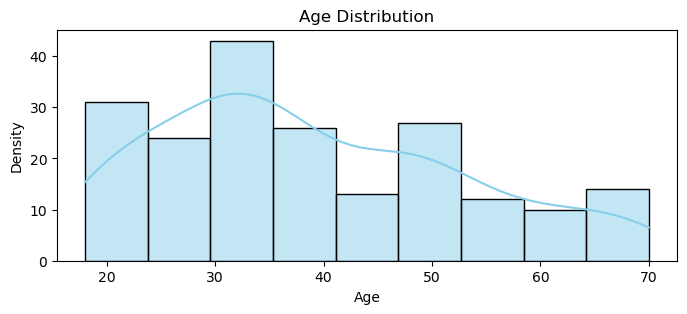

In [14]:
plt.figure(figsize=(8, 3))

# Histogram with KDE
sns.histplot(x="age", data=df, kde=True, color='skyblue')

plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

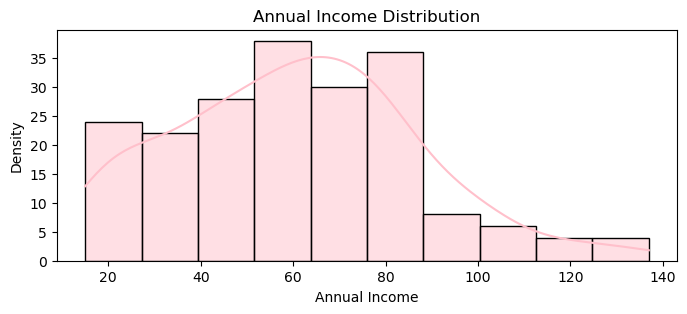

In [15]:
plt.figure(figsize=(8, 3))

# Histogram with KDE
sns.histplot(x="annual_income", data=df, kde=True, color='pink')

plt.title("Annual Income Distribution")
plt.xlabel("Annual Income")
plt.ylabel("Density")
plt.show()

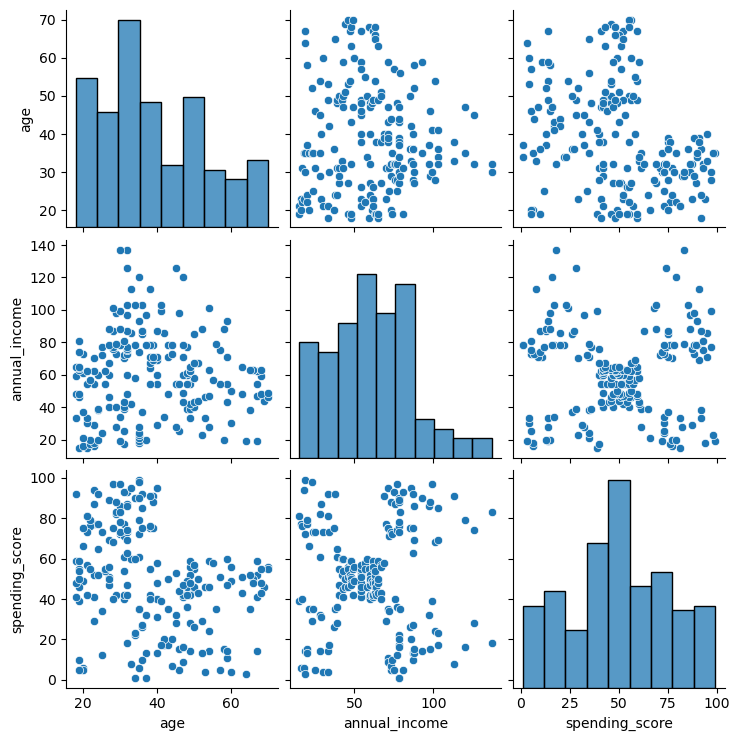

In [16]:
sns.pairplot(df);

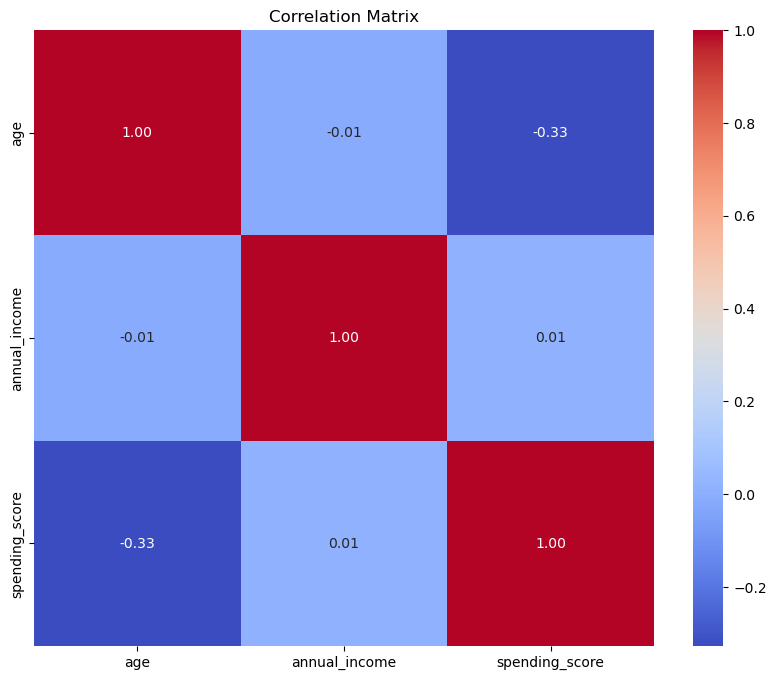

In [17]:
# Select only numeric columns from the DataFrame, so we don't include the genders
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix for numeric columns
correlation_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

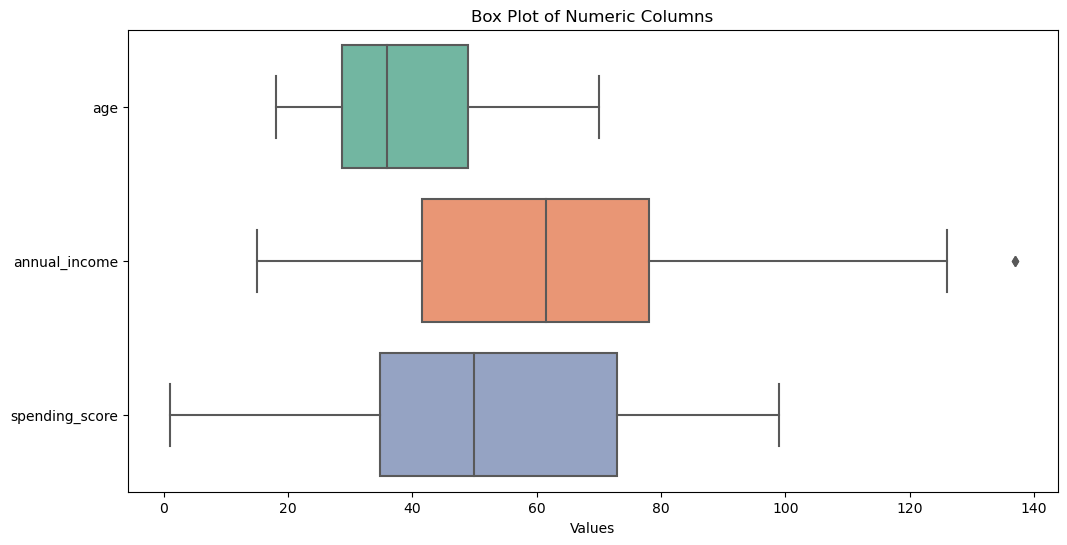

In [18]:
# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['number'])

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Create box plots for each numeric column
sns.boxplot(data=numeric_df, orient='h', palette='Set2')
plt.title("Box Plot of Numeric Columns")
plt.xlabel("Values")

# Display the plot
plt.show()

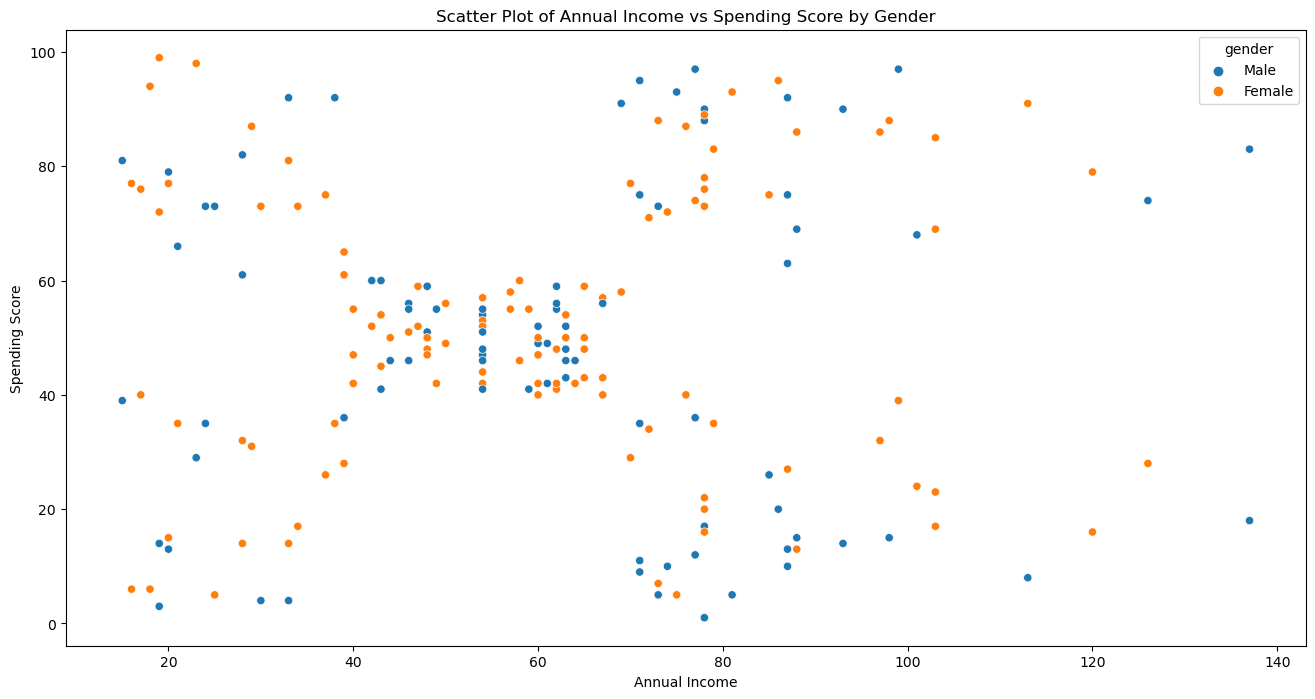

In [19]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x="annual_income", y="spending_score", data=df, hue="gender")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Scatter Plot of Annual Income vs Spending Score by Gender")
plt.show()

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [20]:
# improt libraries 
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [21]:
# Create a new dataset by dropping 'gender' and 'annual_income' columns
df_2 = df.drop(columns=["gender", "annual_income"])

In [22]:
df_2.head()

,age,spending_score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


#### *ii. Determine optimal number of clusters*

In [23]:
ssd = []

for K in range(2,10):
    model = KMeans(n_clusters=K, random_state=42)
    model.fit(df_2)
    ssd.append(model.inertia_)

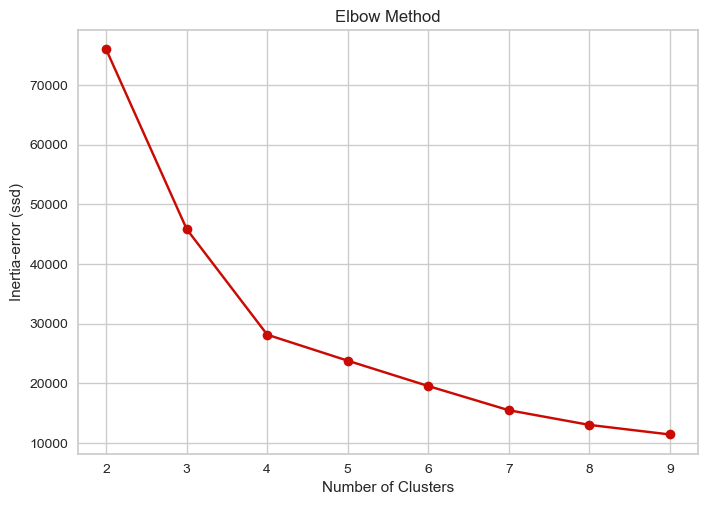

In [24]:
plt.plot(range(2,10), ssd, "ro-")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia-error (ssd)")
plt.title("Elbow Method");

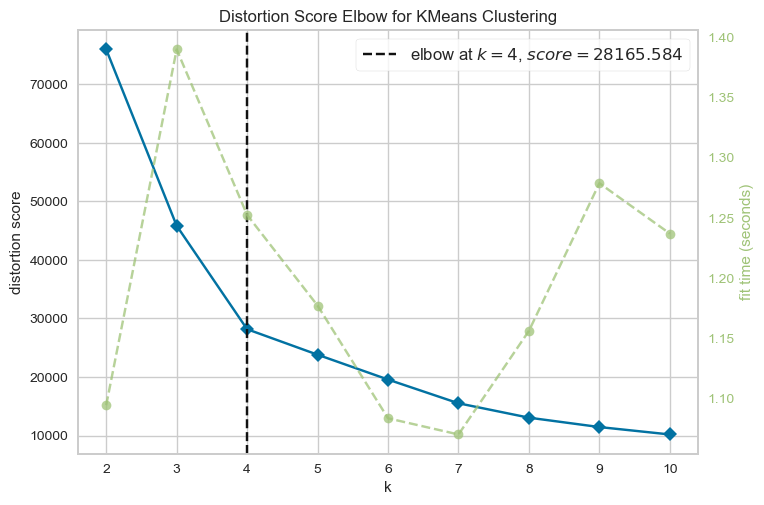

In [30]:
model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k = (2,11))

visualizer.fit(df_2)
visualizer.show();

In [26]:
from sklearn.metrics import silhouette_score

# Define the range of clusters to explore
range_n_clusters = range(2, 9)

# Iterate through the range of clusters
for num_clusters in range_n_clusters:
    # Initialize KMeans with current number of clusters
    model = KMeans(n_clusters=num_clusters, random_state=42)
    model.fit(df_2)  # Assuming X is your feature matrix
    cluster_labels = model.labels_
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(df_2, cluster_labels)
    
    # Print the result
    print(f"Number of Clusters: {num_clusters}, Silhouette Score: {round(silhouette_avg, 3)}")

Number of Clusters: 2, Silhouette Score: 0.469
Number of Clusters: 3, Silhouette Score: 0.453
Number of Clusters: 4, Silhouette Score: 0.5
Number of Clusters: 5, Silhouette Score: 0.445
Number of Clusters: 6, Silhouette Score: 0.448
Number of Clusters: 7, Silhouette Score: 0.423
Number of Clusters: 8, Silhouette Score: 0.428


### Why silhouette_score is negative?

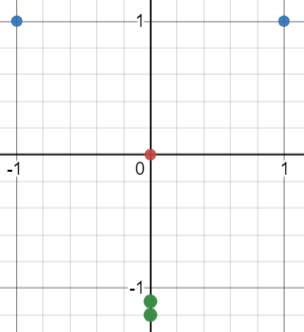

#### *iii. Apply K Means*

In [27]:
model = KMeans(n_clusters=4, random_state=42)
model.fit_predict(df_2)

array([3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 3, 2, 1, 3, 1,
       2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 3,
       2, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 1, 3, 1, 0, 1, 2, 1, 2, 1,
       3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

#### *iv. Visualizing and Labeling All the Clusters*

In [38]:
from sklearn.cluster import AgglomerativeClustering
# Predict cluster labels
cluster_labels = model.predict(df_2)
# Add cluster labels to the original dataset
df['Cluster_4'] = cluster_labels

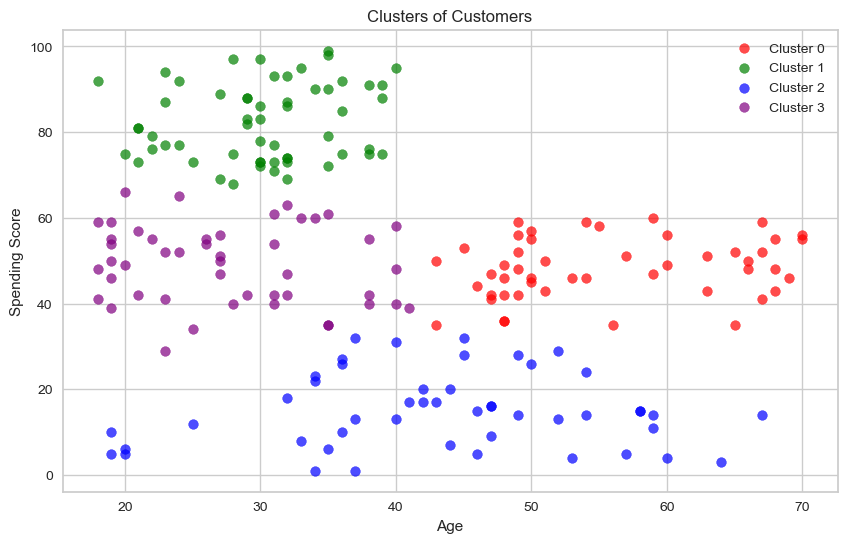

In [39]:
plt.figure(figsize=(10, 6))

# Define colors for the clusters
colors = ['red', 'green', 'blue', 'purple']

# Scatter plot for each cluster
for i in range(4):  # assuming you have 4 clusters
    cluster_data = df[df['Cluster_4'] == i]
    plt.scatter(cluster_data['age'], cluster_data['spending_score'], label=f'Cluster {i}', color=colors[i], alpha=0.7)

plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Clusters of Customers')
plt.legend()
plt.show()

In [40]:
df.head()

,gender,age,annual_income,spending_score,Cluster,Cluster_4
0,Male,19,15,39,3,3
1,Male,21,15,81,1,1
2,Female,20,16,6,2,2
3,Female,23,16,77,1,1
4,Female,31,17,40,3,3


### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [41]:
# Create a new dataset by dropping 'gender' and 'annual_income' columns
df_3 = df[["annual_income", "spending_score"]]

In [42]:
df_3.head()

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


#### *ii. Determine optimal number of clusters*

In [43]:
ssd1 = []

for K in range(2, 10):
    model = KMeans(n_clusters=K, random_state=42)
    model.fit(df_3)
    ssd1.append(model.inertia_)

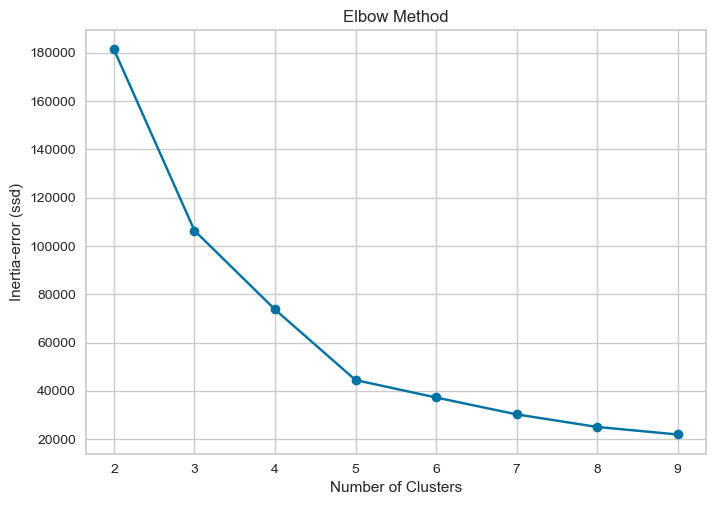

In [44]:
plt.plot(range(2, 10), ssd1, "bo-")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia-error (ssd)")
plt.title("Elbow Method")
plt.show()

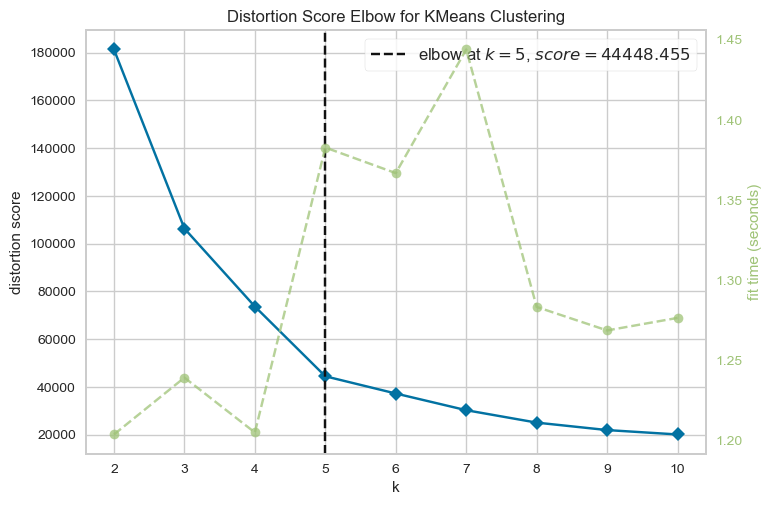

In [45]:
model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k = (2,11))

visualizer.fit(df_3)
visualizer.show();

In [46]:
# Define the range of clusters to explore
range_n_clusters = range(2, 11)

# Iterate through the range of clusters
for num_clusters in range_n_clusters:
    # Initialize KMeans with current number of clusters
    model = KMeans(n_clusters=num_clusters, random_state=42)
    model.fit(df_3)  # Assuming X is your feature matrix
    cluster_labels = model.labels_
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(df_3, cluster_labels)
    
    # Print the result
    print(f"Number of Clusters: {num_clusters}, Silhouette Score: {round(silhouette_avg, 3)}")

Number of Clusters: 2, Silhouette Score: 0.297
Number of Clusters: 3, Silhouette Score: 0.468
Number of Clusters: 4, Silhouette Score: 0.493
Number of Clusters: 5, Silhouette Score: 0.554
Number of Clusters: 6, Silhouette Score: 0.54
Number of Clusters: 7, Silhouette Score: 0.529
Number of Clusters: 8, Silhouette Score: 0.455
Number of Clusters: 9, Silhouette Score: 0.456
Number of Clusters: 10, Silhouette Score: 0.441


#### *iii. Apply K Means*

In [47]:
model = KMeans(n_clusters=5, random_state=42)
model.fit_predict(df_3)

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

#### *iv. Visualizing and Labeling All the Clusters*

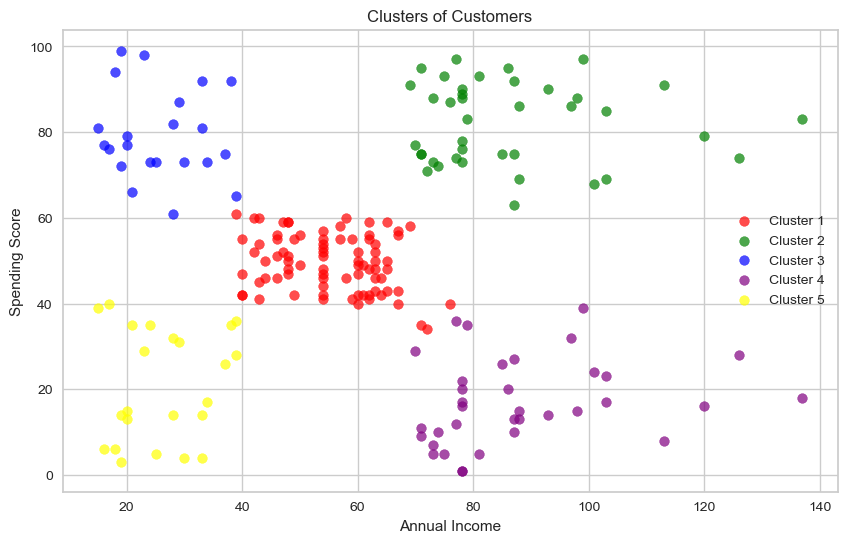

In [48]:
# Predict cluster labels
cluster_labels = model.predict(df_3)
# Add cluster labels to the original dataset
df['Cluster_5'] = cluster_labels + 1  # Adding 1 to start numbering from 1

plt.figure(figsize=(10, 6))

# Define colors for the clusters
colors = ['red', 'green', 'blue', 'purple', 'yellow']

# Scatter plot for each cluster
for i in range(1, 6):  # Start from 1 and iterate up to 5 for 5 clusters
    cluster_data = df[df['Cluster_5'] == i]
    plt.scatter(cluster_data['annual_income'], cluster_data['spending_score'], label=f'Cluster {i}', color=colors[i-1], alpha=0.7)

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Clusters of Customers')
plt.legend()
plt.show()


### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

In [49]:
# Import Libraries 
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

### Clustering based on Age and Spending Score- x1

In [50]:
df_2.head()

,age,spending_score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [51]:
# Determine optimal number of clusters using Dendrogram for df_2
hc_ward = linkage(df_2, method="ward")
hc_complete = linkage(df_2, method="complete")
hc_average = linkage(df_2, method="average")
hc_single = linkage(df_2, method="single")

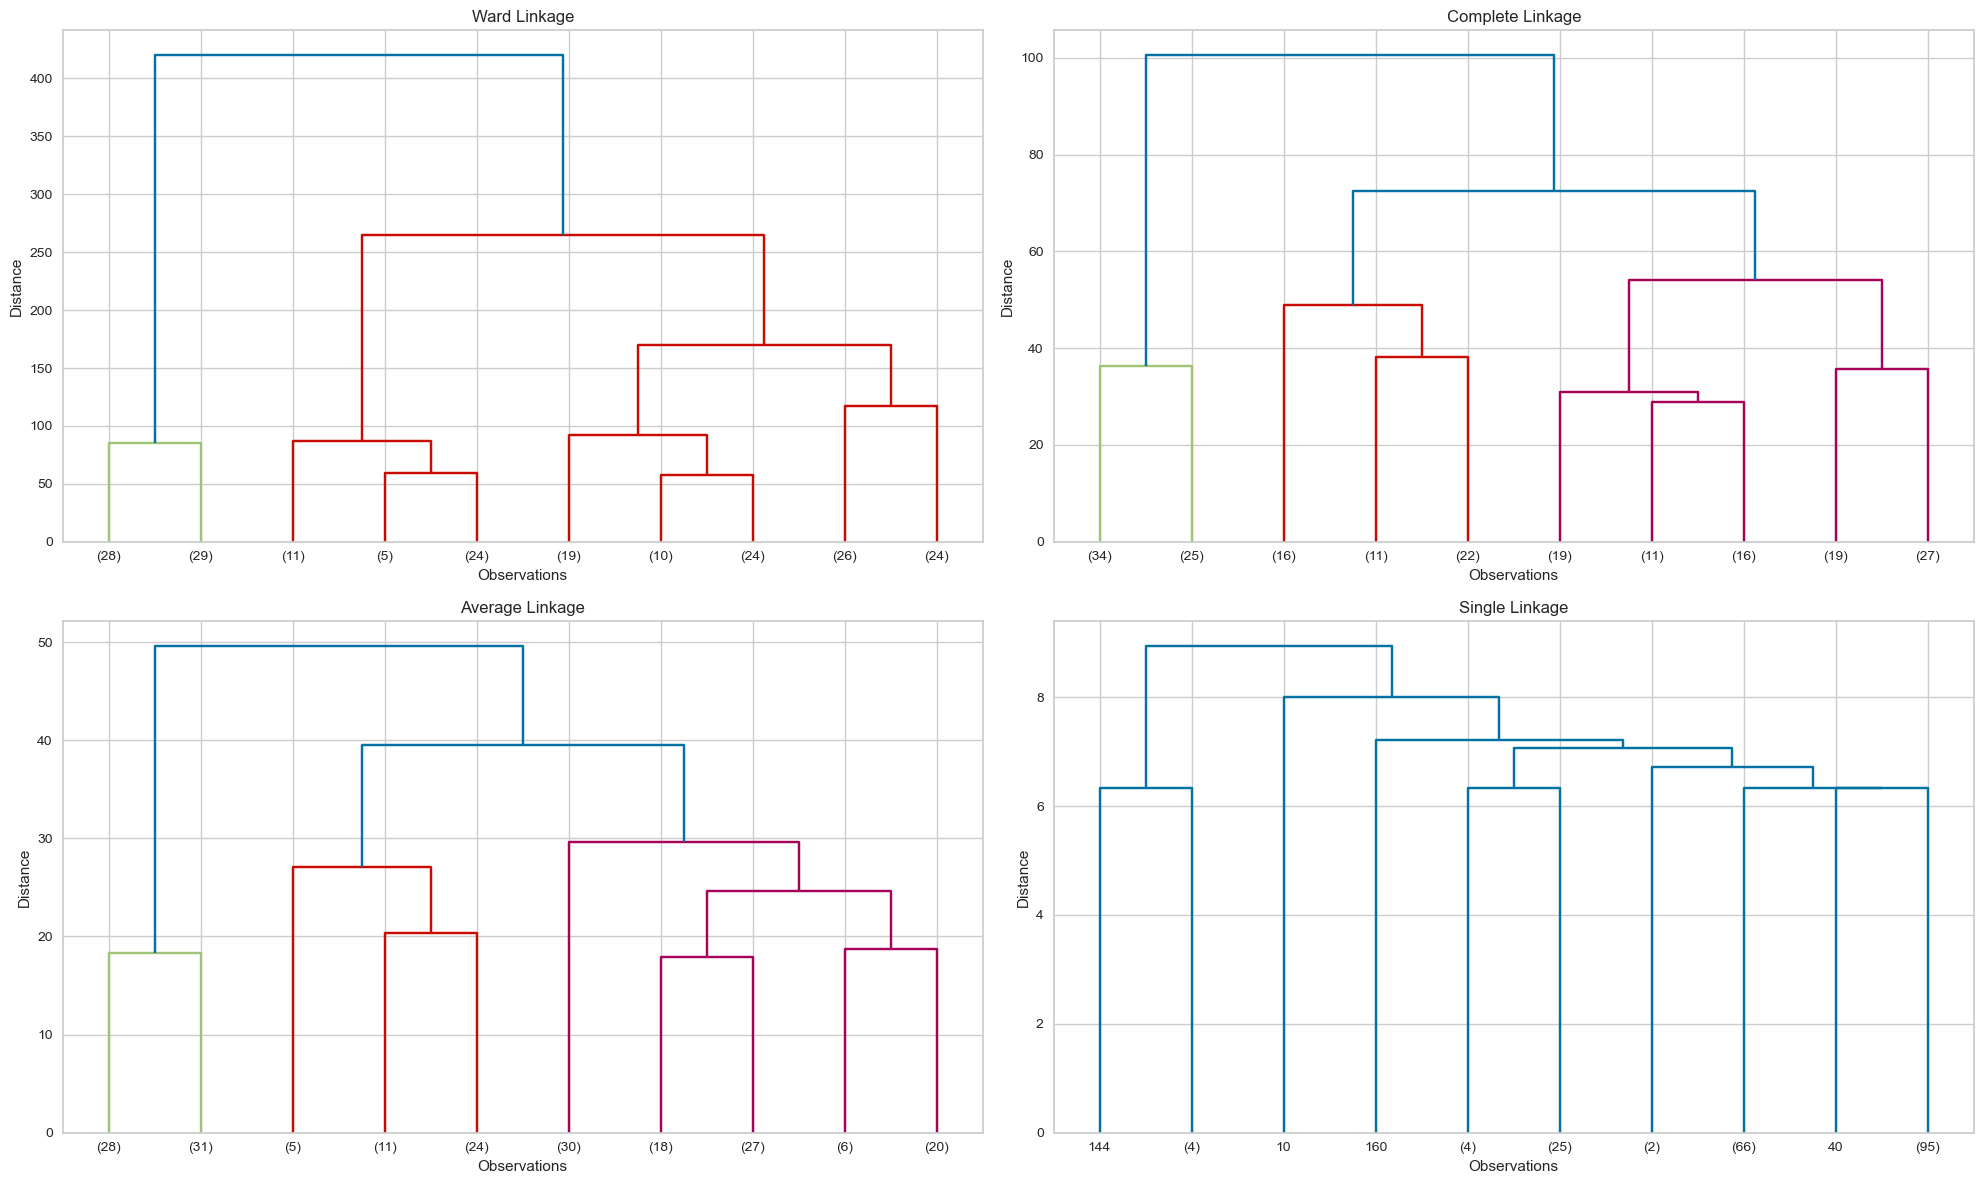

In [52]:
# Define the linkage methods
linkage_methods = ['ward', 'complete', 'average', 'single']
linkage_list = [linkage(df_2, method=method) for method in linkage_methods]

# Define plot titles
plot_titles = ['Ward Linkage', 'Complete Linkage', 'Average Linkage', 'Single Linkage']

# Plot the dendrograms
plt.figure(figsize=(20, 12))
for i, (linkage_result, title) in enumerate(zip(linkage_list, plot_titles), 1):
    plt.subplot(2, 2, i)
    dendrogram(linkage_result, truncate_mode='lastp', p=10, leaf_font_size=10)
    plt.title(title)
    plt.xlabel('Observations')
    plt.ylabel('Distance')
    
plt.tight_layout()
plt.show()

In [53]:
from sklearn.cluster import AgglomerativeClustering
K = range(2,10)
for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit(df_2)
    print(f"Number of Clusters : {k}, Score : {round(silhouette_score(df_2, model.labels_), 3)}")

Number of Clusters : 2, Score : 0.455
Number of Clusters : 3, Score : 0.441
Number of Clusters : 4, Score : 0.46
Number of Clusters : 5, Score : 0.404
Number of Clusters : 6, Score : 0.413
Number of Clusters : 7, Score : 0.416
Number of Clusters : 8, Score : 0.388
Number of Clusters : 9, Score : 0.395


## Clustering based on Annual Income and Spending Score- x2

In [54]:
df_3.head()

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [55]:
# Determine optimal number of clusters using Dendrogram for df_3
hc_ward = linkage(df_2, method="ward")
hc_complete = linkage(df_2, method="complete")
hc_average = linkage(df_2, method="average")
hc_single = linkage(df_2, method="single")

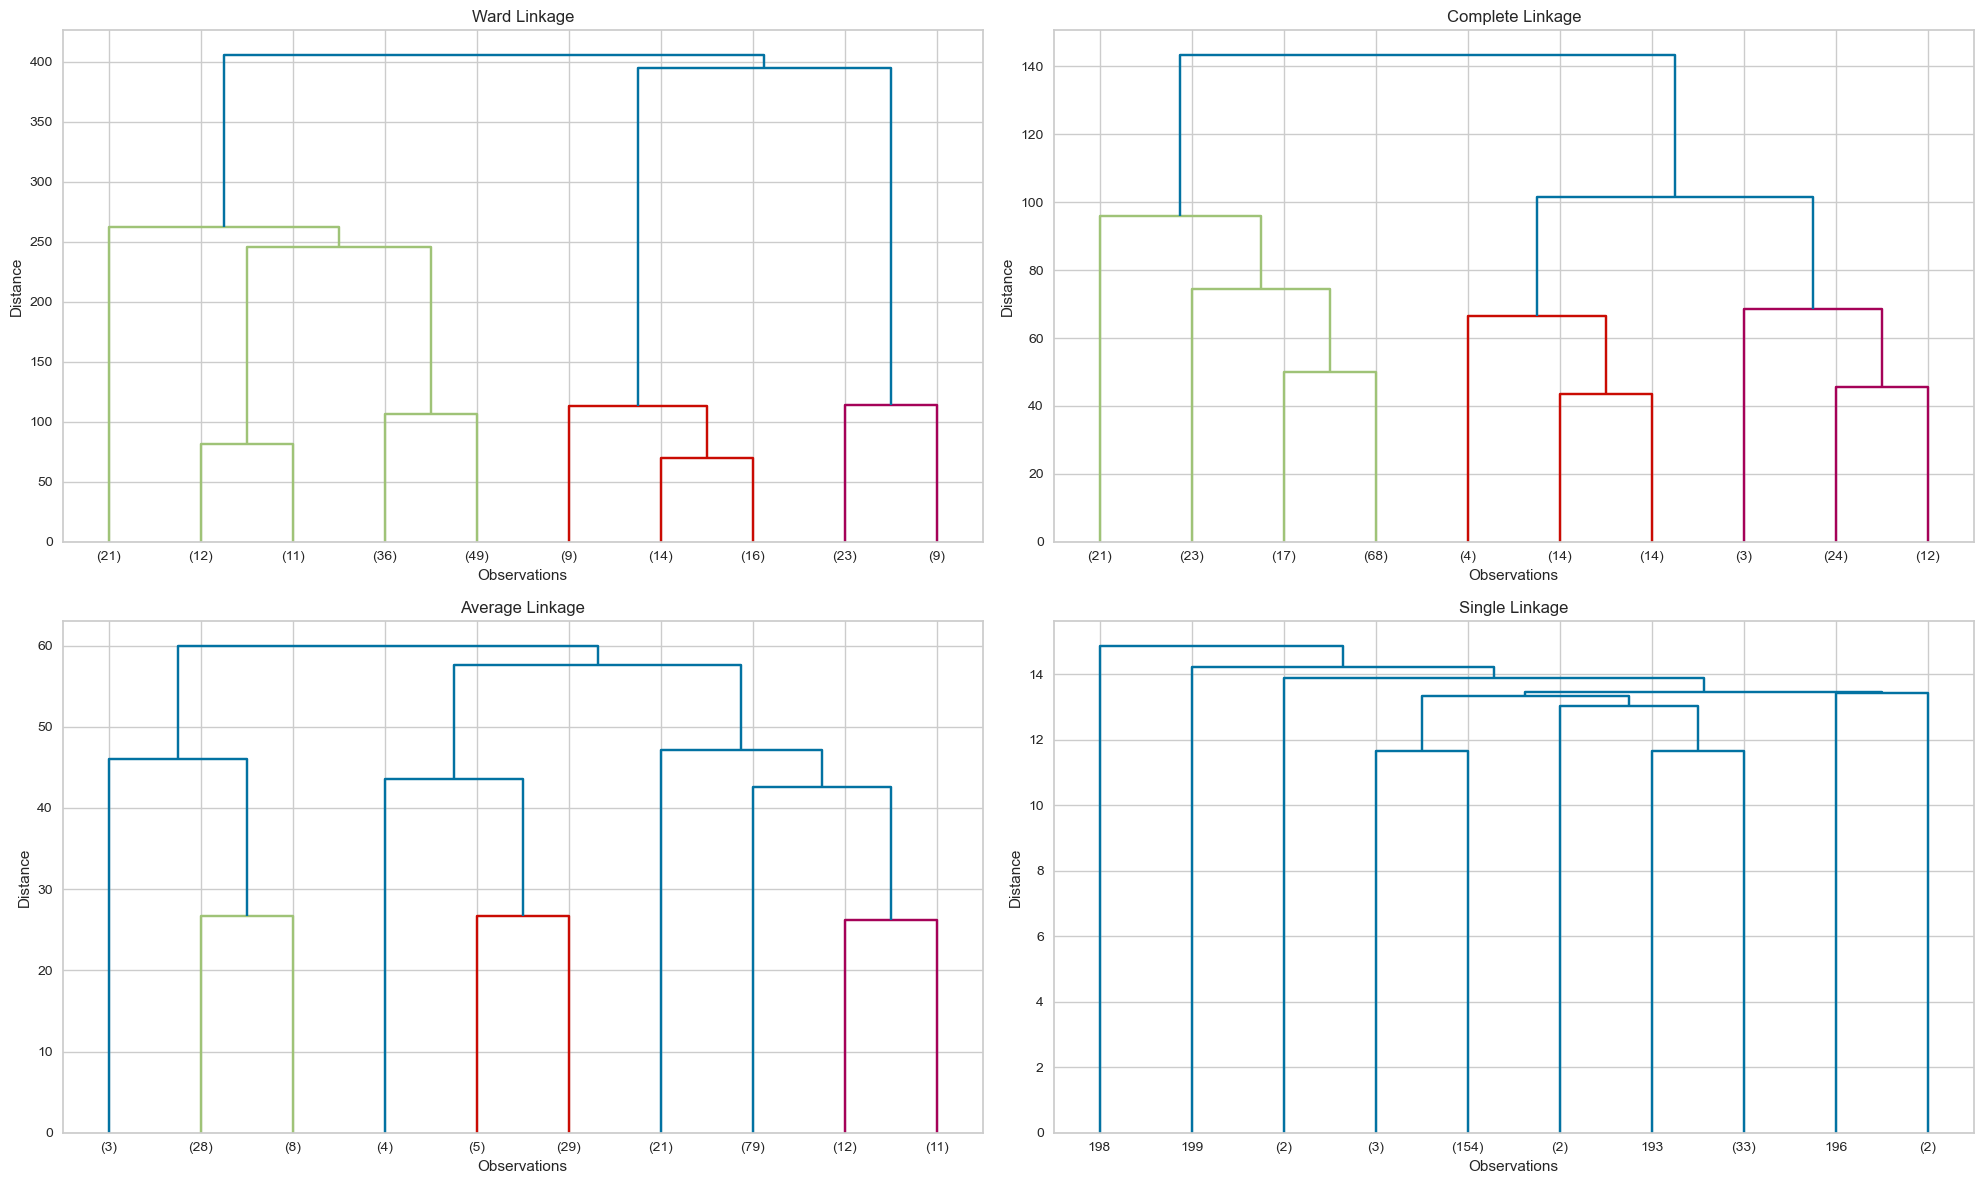

In [56]:
# Define the linkage methods
linkage_methods = ['ward', 'complete', 'average', 'single']
linkage_list = [linkage(df_3, method=method) for method in linkage_methods]

# Define plot titles
plot_titles = ['Ward Linkage', 'Complete Linkage', 'Average Linkage', 'Single Linkage']

# Plot the dendrograms
plt.figure(figsize=(20, 12))
for i, (linkage_result, title) in enumerate(zip(linkage_list, plot_titles), 1):
    plt.subplot(2, 2, i)
    dendrogram(linkage_result, truncate_mode='lastp', p=10, leaf_font_size=10)
    plt.title(title)
    plt.xlabel('Observations')
    plt.ylabel('Distance')
    
plt.tight_layout()
plt.show()

In [57]:
from sklearn.cluster import AgglomerativeClustering
#cluster_range = range(2, 11)
for cluster in range(2,11):
    agg_model = AgglomerativeClustering(n_clusters = cluster)
    agg_model.fit(df_3)
    silhouette_avg = silhouette_score(df_3, agg_model.labels_)
    print(f"Number of Clusters ={cluster}, the silhouette score is {round(silhouette_avg, 3)}")

Number of Clusters =2, the silhouette score is 0.367
Number of Clusters =3, the silhouette score is 0.462
Number of Clusters =4, the silhouette score is 0.492
Number of Clusters =5, the silhouette score is 0.553
Number of Clusters =6, the silhouette score is 0.538
Number of Clusters =7, the silhouette score is 0.52
Number of Clusters =8, the silhouette score is 0.433
Number of Clusters =9, the silhouette score is 0.439
Number of Clusters =10, the silhouette score is 0.434


### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [58]:
# Applying Agglomerative Clustering on Age and Spending Score (df_2)
agglomerative_cluster_df_2 = AgglomerativeClustering(n_clusters=4, linkage='ward')
agglomerative_cluster_df_2.fit_predict(df_2)

array([0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 0, 0, 3, 0, 3,
       2, 3, 2, 3, 0, 1, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 3, 0, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 0, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3,
       2, 3], dtype=int64)

In [94]:
df["4cluster_Agg"] = agglomerative_cluster_df_2.labels_

In [95]:
df.head()

,gender,age,annual_income,spending_score,Cluster_4,Cluster_5,4cluster_Agg
0,Male,19,15,39,3,5,0
1,Male,21,15,81,1,3,3
2,Female,20,16,6,2,5,2
3,Female,23,16,77,1,3,3
4,Female,31,17,40,3,5,0


#### Annual Income and Spending Score- x2

In [96]:
# Applying Agglomerative Clustering on Age and Spending Score (df_2)
agglomerative_cluster_df_3 = AgglomerativeClustering(n_clusters=5, linkage='ward')
agglomerative_cluster_df_3.fit_predict(df_3)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [97]:
df["5cluster_Agg"] = agglomerative_cluster_df_3.labels_

In [98]:
df.head()

,gender,age,annual_income,spending_score,Cluster_4,Cluster_5,4cluster_Agg,5cluster_Agg
0,Male,19,15,39,3,5,0,4
1,Male,21,15,81,1,3,3,3
2,Female,20,16,6,2,5,2,4
3,Female,23,16,77,1,3,3,3
4,Female,31,17,40,3,5,0,4


### iii. *Visualizing and Labeling All the Clusters*

#### Age and Spending Score- x1

Text(0, 0.5, 'Spending Score')

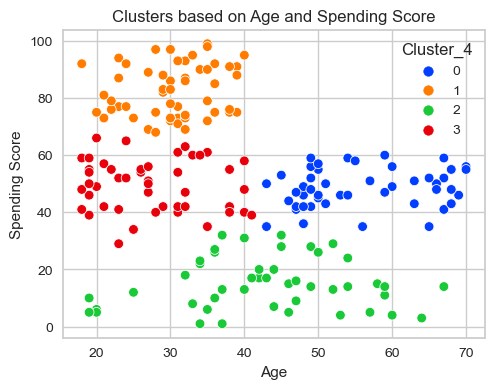

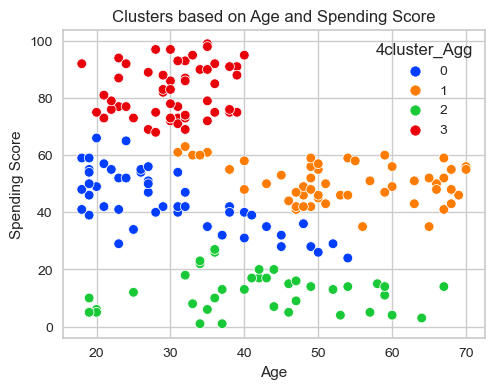

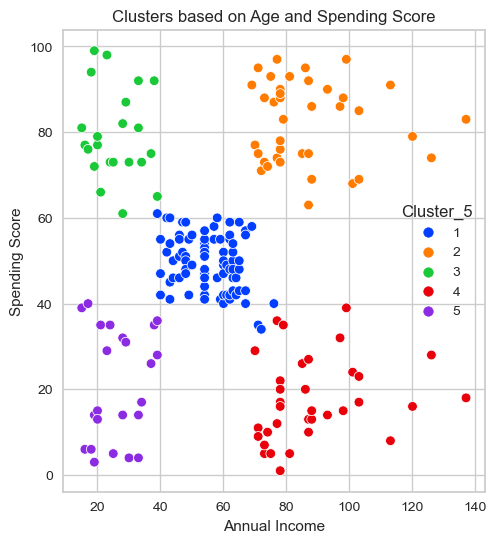

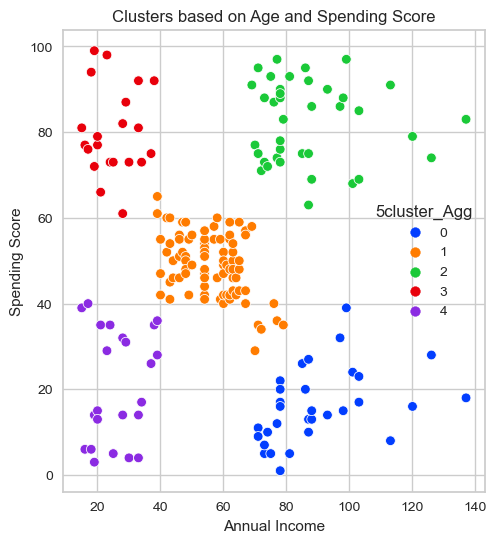

In [105]:
# Age and Spending Score- df_2
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(x="age", y="spending_score", data=df, hue="Cluster_4", palette="bright")
plt.title('Clusters based on Age and Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')

# Age and Spending Score- df_2
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.scatterplot(x="age", y="spending_score", data=df, hue="4cluster_Agg", palette="bright")
plt.title('Clusters based on Age and Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')

# Age and Spending Score- x1
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='annual_income', y='spending_score', data=df, hue="Cluster_5", palette="bright")
plt.title('Clusters based on Age and Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')


# Age and Spending Score- x1
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='annual_income', y='spending_score', data=df, hue="5cluster_Agg", palette="bright")
plt.title('Clusters based on Age and Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')


#### Annual Income and Spending Score- x2

#### Interpretation based on Age and Spending Score- x1

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low.
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

In [106]:
df.head()

,gender,age,annual_income,spending_score,Cluster_4,Cluster_5,4cluster_Agg,5cluster_Agg
0,Male,19,15,39,3,5,0,4
1,Male,21,15,81,1,3,3,3
2,Female,20,16,6,2,5,2,4
3,Female,23,16,77,1,3,3,3
4,Female,31,17,40,3,5,0,4


In [107]:
df["Cluster_4"].value_counts()

Cluster_4
1    57
2    48
0    48
3    47
Name: count, dtype: int64

In [108]:
df["Cluster_5"].value_counts()

Cluster_5
1    81
2    39
4    35
5    23
3    22
Name: count, dtype: int64

In [109]:
df["4cluster_Agg"].value_counts()

4cluster_Agg
3    57
1    53
0    50
2    40
Name: count, dtype: int64

In [110]:
df["5cluster_Agg"].value_counts()

5cluster_Agg
1    85
2    39
0    32
4    23
3    21
Name: count, dtype: int64

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

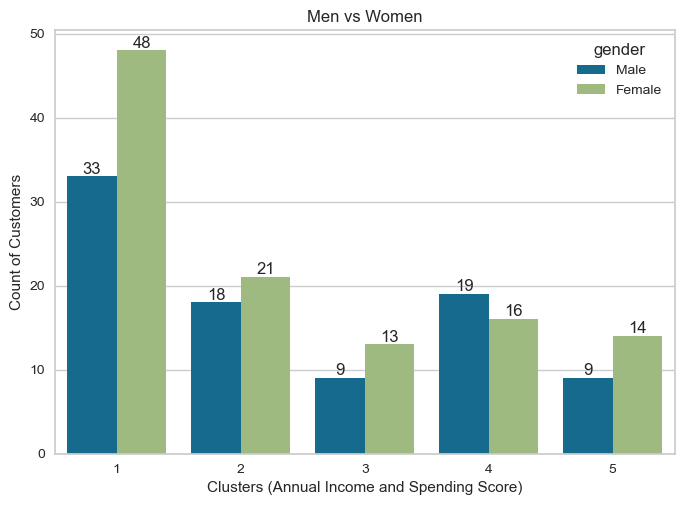

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a countplot with specified data and x, hue parameters
ax = sns.countplot(data=df, x="Cluster_5", hue="gender")

# Add labels to the bars in the countplot
for container in ax.containers:
    ax.bar_label(container)

# Set the title, x-axis label, and y-axis label
plt.title("Men vs Women")
plt.xlabel("Clusters (Annual Income and Spending Score)")
plt.ylabel("Count of Customers")

# Display the plot
plt.show()


**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___